# Welcome to the 5 lab! Now we will make a magic...

## punkt 1 - 2

подключение необходимых библиотек

In [1]:
import glob
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset

#using numpy
import numpy as np

#for data load or save
import pandas as pd

#visualize some datasets
import matplotlib.pyplot as plt

#check our work directory
import os

(часть пункта 2) создание списка путей к картинам, а также разделение его на тестовый, валидный и тренировочный

In [3]:
images_list = []
images_list = glob.glob(os.path.join('dataset/dataset_random_name','*.jpg'))
train_list = images_list[0 : int(len(images_list)*0.8)]
test_list = images_list[int(len(images_list)*0.8) : int(len(images_list)*0.9)]
val_list = images_list[int(len(images_list)*0.9) : int(len(images_list))]

проверка списков

In [4]:
print(len(images_list))
print(images_list[:5])
    
print(len(train_list))
print(train_list[:5])
    
print(len(test_list))
print(test_list[:5])
    
print(len(val_list))
print(val_list[:5])

2085
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
1668
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
208
['dataset/dataset_random_name\\08065.polar_bears.jpg', 'dataset/dataset_random_name\\08070.brown_bears.jpg', 'dataset/dataset_random_name\\08071.polar_bears.jpg', 'dataset/dataset_random_name\\08080.brown_bears.jpg', 'dataset/dataset_random_name\\08084.brown_bears.jpg']
209
['dataset/dataset_random_name\\09081.polar_bears.jpg', 'dataset/dataset_random_name\\09083.brown_bears.jpg', 'dataset/dataset_random_name\\09084.brown_bears.jpg', 'datas

проверка картинок

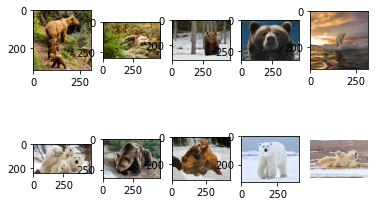

In [5]:
random_idx = np.random.randint(1,len(images_list),size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1

plt.axis('off')
plt.show()

класс dataset, который будет хранить загруженные и преобразованные изображения и метки классов 0 - бурые мишки,     1 - полярные мишки

In [66]:
class dataset(torch.utils.data.Dataset):
    
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        #print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        
        label = img_path.split('/')[-1].split('.')[1]
        if label == 'brown_bears':
            label=0
        elif label == 'polar_bears':
            label=1
        #print(label)  
            
        return img_transformed,label

## punkt 4

пайплайн предобработки данных и формированя набора даных, который непосредственно будет участвовать в обучении

In [7]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

test_transforms = transforms.Compose([   
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    
train_data = dataset(train_list, transform=train_transforms)
test_data = dataset(test_list, transform=test_transforms)
val_data = dataset(val_list, transform=val_transforms)

проверка данных

In [10]:
print(train_data[1])

(tensor([[[0.1765, 0.1686, 0.1569,  ..., 0.8078, 0.7922, 0.7804],
         [0.1961, 0.1843, 0.1725,  ..., 0.8000, 0.7882, 0.7804],
         [0.2118, 0.2000, 0.1882,  ..., 0.7922, 0.7843, 0.7804],
         ...,
         [0.1255, 0.1255, 0.1294,  ..., 0.0824, 0.0863, 0.0863],
         [0.1451, 0.1451, 0.1490,  ..., 0.0824, 0.0824, 0.0824],
         [0.1647, 0.1647, 0.1686,  ..., 0.0824, 0.0824, 0.0824]],

        [[0.1373, 0.1294, 0.1216,  ..., 0.6784, 0.6706, 0.6667],
         [0.1569, 0.1451, 0.1333,  ..., 0.6706, 0.6667, 0.6667],
         [0.1725, 0.1647, 0.1490,  ..., 0.6588, 0.6627, 0.6667],
         ...,
         [0.1059, 0.1059, 0.1098,  ..., 0.1804, 0.1804, 0.1804],
         [0.1294, 0.1294, 0.1294,  ..., 0.1725, 0.1725, 0.1725],
         [0.1490, 0.1490, 0.1490,  ..., 0.1647, 0.1647, 0.1647]],

        [[0.1255, 0.1176, 0.1059,  ..., 0.6078, 0.6157, 0.6196],
         [0.1412, 0.1294, 0.1176,  ..., 0.5961, 0.6118, 0.6196],
         [0.1529, 0.1451, 0.1294,  ..., 0.5804, 0.6000, 0

## punkt 3

задание значений для количества обрабатываемых за раз изобрадений и скорости обучения

In [11]:
lr = 0.001 # learning_rate
batch_size = 100 # we will use mini-batch method

загрузка набора данных в dataloader

In [12]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                          batch_size=batch_size, 
                                          shuffle=False)
val_loader = torch.utils.data.DataLoader(dataset = val_data, 
                                         batch_size=batch_size, 
                                         shuffle=False)

порверка наборов

In [13]:
print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
train_data[0][0].shape

1668 17
209 3


torch.Size([3, 224, 224])

модель сверточной нейросети для решения задачи классификации

In [19]:
class Cnn(nn.Module):
    def __init__(self):
        super(Cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,1)
        self.relu = nn.ReLU()
        
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = torch.nn.Flatten()(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return torch.nn.Sigmoid()(out)

## punkt 5

перенос данных в одно место (у меня это cpu, все работает)

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)
    
model = Cnn().to(device)


задание параметров обработки - оптимизация - обновлене данных и критерий ошибки, по которому сеть будеть обучаться

In [21]:
optimizer = optim.Adam(params = model.parameters(),lr=0.001)
criterion = nn.BCELoss()

цикл обучения нейросети

In [22]:
epochs = 10

accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    
    for data, label in train_loader:
        data = data.to(device)
        label = label.to(device)
        
        output = model(data)
        loss = criterion(output, label.unsqueeze(dim=1).to(torch.float))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        acc = ((output.argmax(dim=1) == label).float().mean())
        epoch_accuracy += acc/len(train_loader)
        epoch_loss += loss/len(train_loader)
        
    print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
    
    accuracy_values.append(epoch_accuracy.item())
    loss_values.append(epoch_loss.item())
    
    with torch.no_grad():
        epoch_val_accuracy=0
        epoch_val_loss =0
        for data, label in val_loader:
            data = data.to(device)
            label = label.to(device)
            
            val_output = model(data)
            val_loss = criterion(val_output,label.unsqueeze(dim=1).to(torch.float))
            
            
            acc = ((val_output.argmax(dim=1) == label).float().mean())
            epoch_val_accuracy += acc/ len(val_loader)
            epoch_val_loss += val_loss/ len(val_loader)
            
        val_accuracy_values.append(epoch_val_accuracy.item())
        val_loss_values.append(epoch_val_loss.item())
        print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))

Epoch : 1, train accuracy : 0.4909343123435974, train loss : 0.33535122871398926
Epoch : 1, val_accuracy : 0.602222204208374, val_loss : 0.22906902432441711
Epoch : 2, train accuracy : 0.49038055539131165, train loss : 0.20328113436698914
Epoch : 2, val_accuracy : 0.602222204208374, val_loss : 0.16655386984348297
Epoch : 3, train accuracy : 0.4898270070552826, train loss : 0.21662837266921997
Epoch : 3, val_accuracy : 0.602222204208374, val_loss : 0.11582181602716446
Epoch : 4, train accuracy : 0.49148792028427124, train loss : 0.16650553047657013
Epoch : 4, val_accuracy : 0.602222204208374, val_loss : 0.12325778603553772
Epoch : 5, train accuracy : 0.49038058519363403, train loss : 0.16254611313343048
Epoch : 5, val_accuracy : 0.602222204208374, val_loss : 0.12032775580883026
Epoch : 6, train accuracy : 0.4906574487686157, train loss : 0.1521664559841156
Epoch : 6, val_accuracy : 0.602222204208374, val_loss : 0.09860461950302124
Epoch : 7, train accuracy : 0.4920414686203003, train lo

## punkt 6

на созданных во время обучения наборах строятся графики для значений функции потерь и метрики качества

график для обучающей выборки

[0.4909343123435974, 0.49038055539131165, 0.4898270070552826, 0.49148792028427124, 0.49038058519363403, 0.4906574487686157, 0.4920414686203003, 0.49148789048194885, 0.49121108651161194, 0.48982691764831543]
------------------------------
[0.33535122871398926, 0.20328113436698914, 0.21662837266921997, 0.16650553047657013, 0.16254611313343048, 0.1521664559841156, 0.1327742040157318, 0.13130365312099457, 0.12560632824897766, 0.11248759180307388]


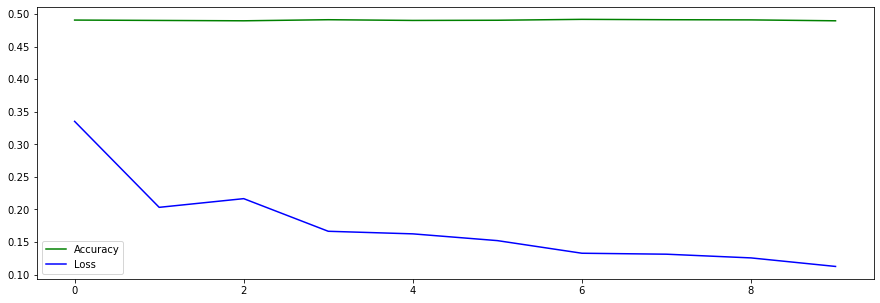

In [23]:
print(accuracy_values)
print('------------------------------')
print(loss_values)
plt.figure(figsize=(15, 5))
plt.plot(range(10), accuracy_values, color="green")
plt.plot(range(10),loss_values, color="blue")
plt.legend(["Accuracy", "Loss"])

график для валидационной выборки

[0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374]
------------------------------
[0.22906902432441711, 0.16655386984348297, 0.11582181602716446, 0.12325778603553772, 0.12032775580883026, 0.09860461950302124, 0.13762131333351135, 0.11306432634592056, 0.1116519346833229, 0.11323697119951248]


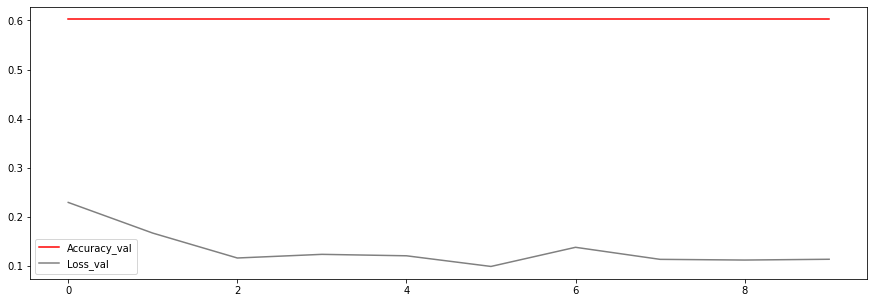

In [24]:
print(val_accuracy_values)
print('------------------------------')
print(val_loss_values)
plt.figure(figsize=(15, 5))
plt.plot(range(10), val_accuracy_values, color="red")
plt.plot(range(10),val_loss_values, color="gray")
plt.legend(["Accuracy_val", "Loss_val"])

## punkt 9

сохранение модели 

In [31]:
torch.save(model.state_dict(), os.path.join("C:/Users/zamot/OneDrive/Application-programming-laba-1-2", "weight.pt"))

## punkt 10

повторная инициализация модели

In [34]:
mymodel = Cnn()
mymodel.load_state_dict(torch.load(os.path.join("C:/Users/zamot/OneDrive/Application-programming-laba-1-2", "weight.pt")))

<All keys matched successfully>

запуск модеи на тестовых данных

In [42]:
mymodel.eval()

test_loss = 0
test_accuracy = 0
    
for data, label in test_loader:
    data = data.to(device)
    label = label.to(device)

    output = mymodel(data)
    
    acc = np.array(([1 if (1 if output[j][0].detach() >= 0.5 else 0) == int(label[j]) else 0 for j in range(4)])).mean()
    test_accuracy += acc / len(test_loader)
    test_loss += float(loss.detach()) / len(test_loader)

получение значений точности и потерь

In [43]:
print(test_accuracy, test_loss)

0.9166666666666666 0.1370750069618225


проверка модели на 2х рандомных картинках

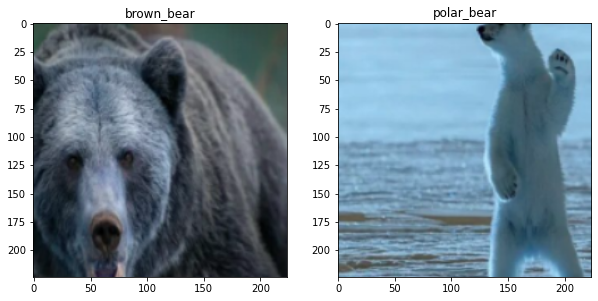

In [65]:
import random
plt.figure(figsize=(10, 5))

for j in range(2):
  index = random.randint(0, len(test_data))
  plt.subplot(1, 2, j + 1)
  plt.title("brown_bear" if (1 if  model(test_data[index][0].unsqueeze(dim=0))[0] >= 0.5 else 0) == 0 else "polar_bear")
  plt.imshow(test_data[index][0].permute(1, 2, 0).numpy()[:, :, ::-1])

## Ураааа! Чудо свершилось!!! Теперь ждем атаку нейросетей...

просто проверка на коммит...